In [63]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from gaussian_3D import *
from scipy.stats import multivariate_normal

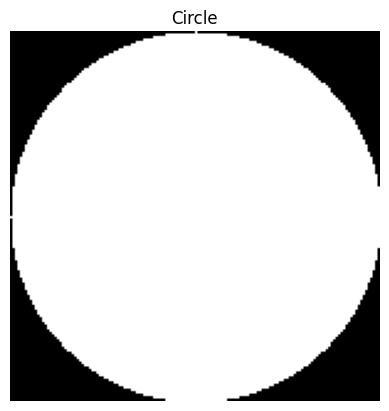

In [183]:
import numpy as np
import matplotlib.pyplot as plt

# 15x15 크기의 동그라미를 그릴 빈 배열 생성
size = 150
circle_array = np.zeros((size, size))

# 배열 중심 계산
center_x, center_y = size // 2, size // 2

# 동그라미 반지름 설정
radius = min(center_x, center_y)

# 중심에서의 거리를 계산하고 동그라미 내부의 값 설정
for i in range(size):
    for j in range(size):
        distance = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
        if distance <= radius:
            circle_array[i, j] = 1.0

# 동그라미 배열을 시각화
plt.imshow(circle_array, cmap='gray', origin='upper')
plt.axis('off')  # 축을 표시하지 않음
plt.title('Circle')
plt.show()

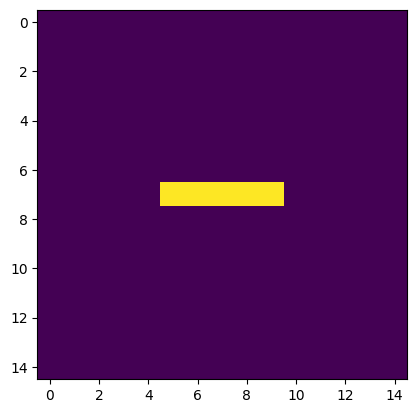

In [124]:
# 이미지 생성
img = np.zeros([15,15])
for i in range(5):
    img[7,i + 7- 2] = 1
plt.imshow(img)

In [112]:
# Q = c + sxi + syj + szk
user_sz = 0.5
c = (1 - user_sz**2)**0.5
Q = torch.tensor([[c,0,0,user_sz]])
S = torch.tensor([[2,1,1]])
M = torch.tensor([[7,7,0]])

C = build_covariance(S, Q) #시그마

# 공분산 행렬
C = C.numpy()[0]

x, y, z = np.mgrid[0:15:1, 0:15:1, 0:1]
pos = np.empty(x.shape + (3,))
pos[:, :, :, 0] = x; pos[:, :, :, 1] = y; pos[:, :, :, 2] = z

# 3변수 가우시안 정의
rv = multivariate_normal(*M, C)
density = rv.pdf(pos)
density = density/density.max()

0.7146586114643285

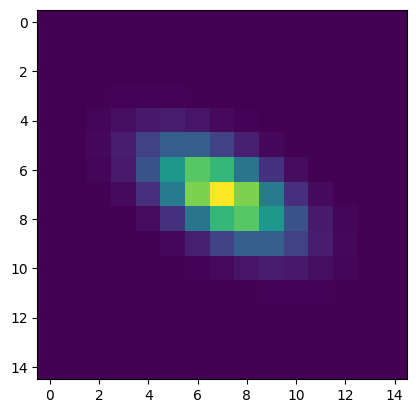

In [113]:
plt.imshow(density)
density[7,5:10].sum() - density[5:10,7].sum()


In [74]:
(density - img > 0).all()

False

In [205]:
 x_a = list(range(101))
 loss_array = []
 for i in range(101):
    # 이미지 생성
    img = np.zeros([150,150])
    for j in range(5):
        img[75,j + 75- 2] = 1

    # Q = c + sxi + syj + szk
    user_sz = (i%100)/100
    c = (1 - user_sz**2)**0.5
    Q = torch.tensor([[c,0,0,user_sz]])
    S = torch.tensor([[20,10,1]])
    M = torch.tensor([[75,75,0]])

    C = build_covariance(S, Q) #시그마

    # 공분산 행렬
    C = C.numpy()[0]

    x, y, z = np.mgrid[0:150:1, 0:150:1, 0:1]
    pos = np.empty(x.shape + (3,))
    pos[:, :, :, 0] = x; pos[:, :, :, 1] = y; pos[:, :, :, 2] = z

    # 3변수 가우시안 정의
    rv = multivariate_normal(*M, C)
    density = rv.pdf(pos)
    density = density/density.max() * 1

    loss_array.append((np.abs(density)*circle_array).sum())

    

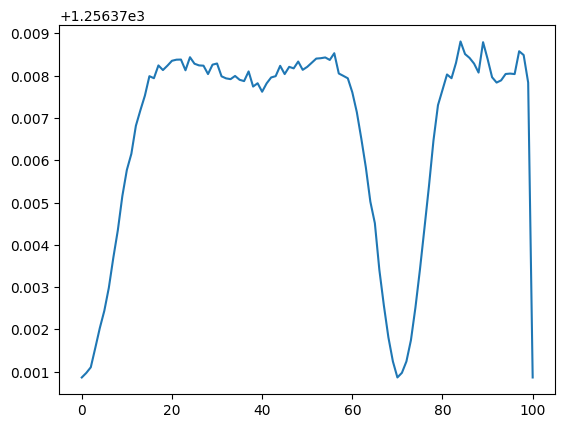

In [206]:
plt.plot(x_a,loss_array)